In [15]:
from edahelper import *
import sklearn.naive_bayes as NB
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
# Resources:

#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


In [ ]:
wsb = pd.read_pickle('../Data/wsb_cleaned.pkl')

 ## Preprocessing
 
 Removing characters that are not alphanumeric or spaces:

In [4]:
regex = re.compile('[^a-zA-Z ]')
for col in ['title', 'author', 'selftext']:
    wsb[col] = wsb[col].apply(lambda x : regex.sub('', str(x) ))

Filtering the data frame, count vectorizing titles.

In [12]:
df = wsb[wsb.ups >= 20] # Filtering to save processing time

def count_vectorizing(df, col):
    corpus = list(df[col])
    return CountVectorizer().fit_transform(corpus)

In [13]:
X_title = count_vectorizing(df, "title")

In [14]:
X_selftext = count_vectorizing(df, "selftext")

Frequency counting... TODO

In [ ]:

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearRegression()),
])

# Can we predict the number of upvotes?

## NLP on words in the title


<AxesSubplot:xlabel='predicted', ylabel='true'>

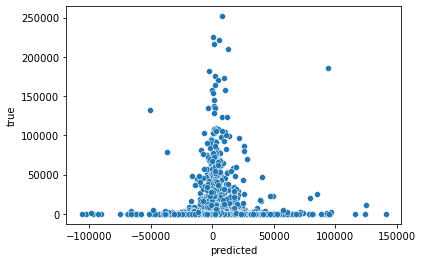

In [10]:
y = df.ups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)


clf = sklearn.linear_model.LinearRegression().fit(X = X_train, y = y_train)

preds = clf.predict(X_test)

results = pd.DataFrame()
results["predicted"] = clf.predict(X_test)
results["true"] = list(y_test)
sns.scatterplot(data = results, x = "predicted", y = "true")


Doesn't look particularly useful... neither does using lasso...

<AxesSubplot:xlabel='predicted', ylabel='true'>

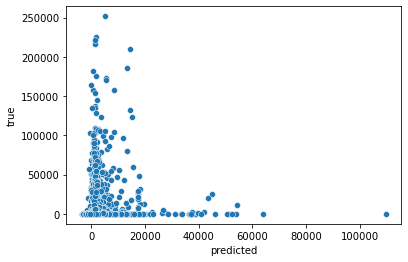

In [11]:
y = df.ups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)


clf = sklearn.linear_model.Lasso().fit(X = X_train, y = y_train)

preds = clf.predict(X_test)

results = pd.DataFrame()
results["predicted"] = clf.predict(X_test)
results["true"] = list(y_test)
sns.scatterplot(data = results, x = "predicted", y = "true")


# Can we predict if a post will be ignored?

In [ ]:
wsb['ignored'] = wsb['ups'] <= 100 # What is a good cutoff for being ignored?
df = wsb[ wsb['ups'] >= 20]


# Can we cluster similar posts?